In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

\begin{tabular}{rr}
\toprule
Wert & Wahrscheinlichkeit \\
\midrule
2 & 0.027778 \\
3 & 0.055556 \\
4 & 0.083333 \\
5 & 0.111111 \\
6 & 0.138889 \\
7 & 0.166667 \\
8 & 0.138889 \\
9 & 0.111111 \\
10 & 0.083333 \\
11 & 0.055556 \\
12 & 0.027778 \\
\bottomrule
\end{tabular}

Erwartungswert: 7.0
Varianz: 5.833333333333333


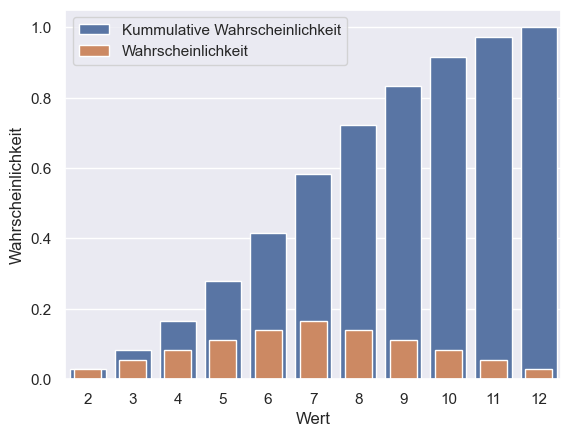

In [ ]:
# each value is equally likely, therefore the probability of the outcomes is given by
outcomes = np.array([a+b+2 for a in range(6) for b in range(6)])
values = np.arange(2,13)
probabilities = np.histogram(outcomes, bins=np.arange(2,14), density=True)[0]

# we can now make the table
probabilities_table = pd.DataFrame({'Wert': values, 'Wahrscheinlichkeit': probabilities})
print(probabilities_table.to_latex(index=False))

sns.barplot(probabilities_table, x = 'Wert', y = probabilities_table['Wahrscheinlichkeit'].cumsum(), label = 'Kummulative Wahrscheinlichkeit')
sns.barplot(probabilities_table, x = 'Wert', y = 'Wahrscheinlichkeit', width=0.6, label  = 'Wahrscheinlichkeit')

# calculate the expected value and variance
expected_value = outcomes.mean()
variance = outcomes.var(ddof=0)
print(f'Erwartungswert: {expected_value}')
print(f'Varianz: {variance}')


In [ ]:
data = pd.read_csv('obs_res_LARES.dat', names = ['time', 'residuals [mm]'], index_col=False, sep='\s+')

#remove the dashes '---'
data.drop(index = [0,1], inplace=True)
data['time'] = data['time'].astype(float)
data['residuals [mm]'] = data['residuals [mm]'].astype(float)
display(data)

C:\Users\cedric\AppData\Local\Temp\ipykernel_6668\4068088953.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('obs_res_LARES.dat', names = ['time', 'residuals [mm]'], index_col=False, sep='\s+')


,time,residuals [mm]
2,57266.642431,-40.3
3,57266.642616,-51.6
4,57269.507025,-20.5
5,57269.507407,-14.1
6,57269.507697,-10.2
...,...,...
20710,57356.930127,4.4
20711,57356.930637,8.0
20712,57356.930949,13.6
20713,57356.931273,10.9


In [ ]:
def get_inliers(data : np.ndarray, max_std : float= 4.0, iterative : bool = True):
    
    # start with the entire data as inliers
    inliers = np.ones_like(data, dtype=bool)
    
    while True:
        std = data[inliers].std()
        mean = data[inliers].mean()
        
        new_inliers = np.abs(data-mean) < max_std*std
        
        # stop iterating if specified or if no inliers removed
        if (not iterative) or np.all(new_inliers == inliers):
            inliers = new_inliers
            break
        
        inliers = new_inliers
        
    return inliers

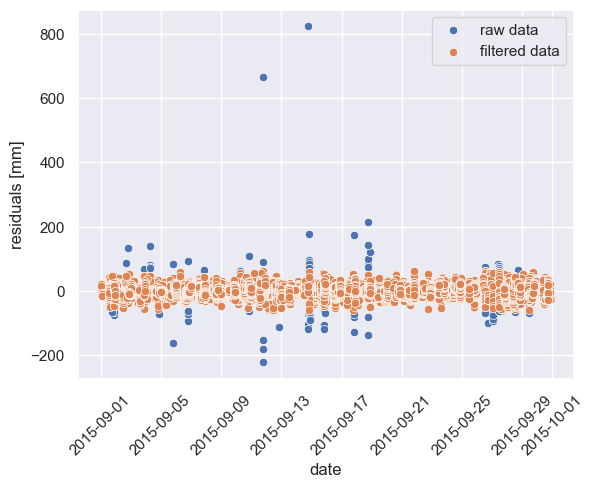

Analyse der daten vom September:
Mittelwert : -0.139
Unsicherheit des Mittelwerts : 0.160


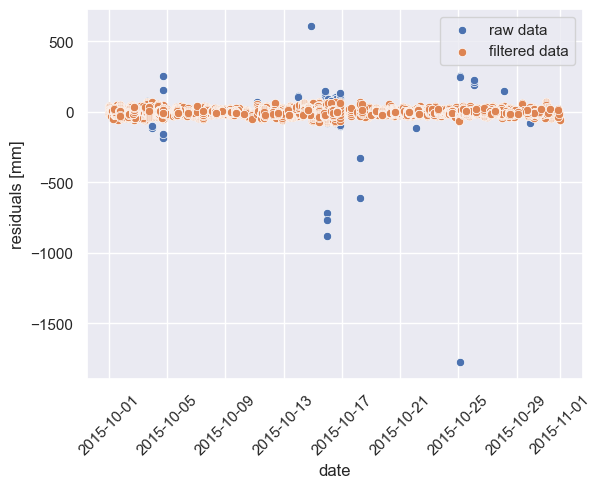

Analyse der daten vom Oktober:
Mittelwert : -0.212
Unsicherheit des Mittelwerts : 0.239


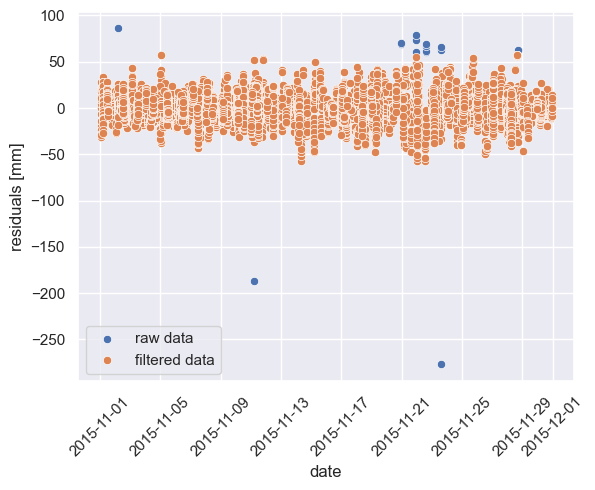

Analyse der daten vom November:
Mittelwert : -0.219
Unsicherheit des Mittelwerts : 0.194


In [ ]:
from astropy.time import Time

time_values = Time(val = data['time'], format = 'mjd')
data['date'] = pd.DatetimeIndex(time_values.to_datetime())

for month, month_name in zip([9,10,11], ['September', 'Oktober', 'November']):
    
    data_of_the_month = data.loc[data['date'].dt.month == month]
    inliers = get_inliers(data_of_the_month['residuals [mm]'])
    filtered_data = data_of_the_month.loc[inliers]
    
    sns.scatterplot(data_of_the_month, x = 'date', y = 'residuals [mm]', label = 'raw data')    
    sns.scatterplot(filtered_data, x = 'date', y = 'residuals [mm]', label = 'filtered data')
    plt.xticks(rotation = 45)
    plt.show()
    print(f'Analyse der daten vom {month_name}:')
    print(f'Mittelwert : {filtered_data["residuals [mm]"].mean():.3f}')
    
    # Formel aus skript S.8
    uncertainty = filtered_data["residuals [mm]"].std() / np.sqrt(len(filtered_data))
    
    print(f'Unsicherheit des Mittelwerts : {uncertainty:.3f}')